In [1]:
# Useful modules to import
%matplotlib notebook
import sys
import re
import os
import copy
import shutil
import glob
import cv2
from PIL import Image
import numpy as np
import numpy.ma as ma
import math as m
import matplotlib as mpl
#mpl.use('TkAgg')
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import data
from os import listdir, walk
from os.path import isfile

In [4]:
!dir Neptune_moon_images

 Volume in drive C is Windows
 Volume Serial Number is 06DC-3AD5

 Directory of C:\Users\Jimmy_Bainbridge\Desktop\Neptune_moons\Neptune_moon_images

07/12/2018  10:49 AM    <DIR>          .
07/12/2018  10:49 AM    <DIR>          ..
06/12/2018  03:44 AM            49,025 21_56_56.jpg
06/12/2018  03:44 AM            50,411 21_57_45.jpg
06/12/2018  03:44 AM            51,343 21_58_36.jpg
06/12/2018  03:44 AM            51,726 21_59_28.jpg
06/12/2018  03:44 AM            47,464 22_00_19.jpg
06/12/2018  03:44 AM            49,297 22_01_10.jpg
06/12/2018  03:44 AM            49,006 22_02_01.jpg
06/12/2018  03:44 AM            50,703 22_02_54.jpg
06/12/2018  03:44 AM            49,384 22_03_45.jpg
06/12/2018  03:44 AM            50,250 22_04_36.jpg
              10 File(s)        498,609 bytes
               2 Dir(s)  862,799,802,368 bytes free


In [5]:
h = []
for filename in os.listdir('Neptune_moon_images'):
    if filename.endswith(".jpg"):
        h.append(filename)
        #h.extend(filename)
        continue
    else:
        continue

print(h)

['21_56_56.jpg', '21_57_45.jpg', '21_58_36.jpg', '21_59_28.jpg', '22_00_19.jpg', '22_01_10.jpg', '22_02_01.jpg', '22_02_54.jpg', '22_03_45.jpg', '22_04_36.jpg']


In [25]:
# Load a frame to experiment with
xMoonLst_pix = []
yMoonLst_pix = []
xNepLst_pix = []
yNepLst_pix = []
frmNumLst = []
frmMoon = []
xMoon = []
yMoon = []
xNeptune = []
yNeptune = []
X_pix = []
Y_pix = []
ARTVAR = 1
NEPVAR = 36

for k in range(len(h)):
    
    frameFile = np.array(h)
    imgPIL = Image.open("C:\\Users\\Jimmy_Bainbridge\\Desktop\\Neptune_moons\\Neptune_moon_images\\%s"%frameFile[k])
    frameArr = np.flipud(np.asarray(imgPIL))   # Flip upright
    frameArr = frameArr.astype("f4")           # Convert to float32 for ease
    frameArr = cv2.cvtColor(frameArr, cv2.COLOR_RGB2GRAY)


    #Pixel mask of one image
    mean1 = np.mean(frameArr)
    print(mean1)
    mask = (frameArr > 1.5*mean1)
    #mask += 0.1 * mean1
    #fig, ax = plt.subplots()
    #ax.imshow(mask)
    #plt.show()
    #print(mask.shape)
    #print(mean1)
    mask

    #Finding the objects
    label_im, nb_labels = ndimage.label(mask)
    objects = ndimage.find_objects(label_im)
    #print(objects)

    def centroid(data):
        h, w = np.shape(data)
        x = np.arange(0, w)
        y = np.arange(0, h)
        X, Y = np.meshgrid(x, y)
        cx = np.sum(X*data)/np.sum(data)
        cy = np.sum(Y*data)/np.sum(data)
        return cx, cy


    for l in range(len(objects)):
        dx, dy = objects[l]
        xoffset, yoffset = dx.start, dy.start
        submask = mask[objects[l]]
        findobjects = centroid(submask)
        cx, cy = findobjects
        cx += xoffset
        cy += yoffset
        print(cx, cy)
        X_pix.append(cx)
        Y_pix.append(cy)
        size = np.shape(submask)
        print(size)
        width, height = size

        if ARTVAR < width < NEPVAR:
            print("This is a moon")
            xMoonLst_pix.append(cx)
            yMoonLst_pix.append(cy)
            frmNumLst.append(k)
        elif width > NEPVAR:
            xNepLst_pix.append(cx)
            yNepLst_pix.append(cy)
            print("This is Neptune")                                                                                       
        else:
            print("This is an artefact")

13.31731
39.125 679.1666666666666
(4, 8)
This is a moon
389.5315243415802 854.8770949720671
(40, 41)
This is Neptune
370.0 861.0
(1, 1)
This is an artefact
422.22105263157897 840.7789473684211
(12, 10)
This is a moon
714.5 1321.0
(3, 6)
This is a moon
738.5 1102.5
(2, 2)
This is a moon
738.0 1108.5
(2, 1)
This is a moon
879.25 1003.75
(2, 3)
This is a moon
879.0 1010.0
(3, 3)
This is a moon
1082.6666666666667 1295.3333333333333
(2, 2)
This is a moon
1082.0 1303.0
(1, 1)
This is an artefact
13.32969
37.333333333333336 676.125
(5, 6)
This is a moon
224.0 592.0
(1, 1)
This is an artefact
369.0 852.0
(1, 1)
This is an artefact
389.7874432677761 856.9039334341907
(41, 43)
This is Neptune
406.0 870.0
(1, 1)
This is an artefact
422.81188118811883 843.1683168316831
(12, 11)
This is a moon
529.0 1075.2857142857142
(3, 3)
This is a moon
676.0 1226.0
(3, 3)
This is a moon
713.0 1318.0
(5, 5)
This is a moon
738.7894736842105 1100.0
(5, 5)
This is a moon
871.0 797.0
(3, 3)
This is a moon
878.9 1001

0 (39.125,)
0 (679.1666666666666,)
0 (422.22105263157897,)
0 (840.7789473684211,)
0 (714.5,)
0 (1321.0,)
0 (738.5,)
0 (1102.5,)
0 (738.0,)
0 (1108.5,)


<IPython.core.display.Javascript object>


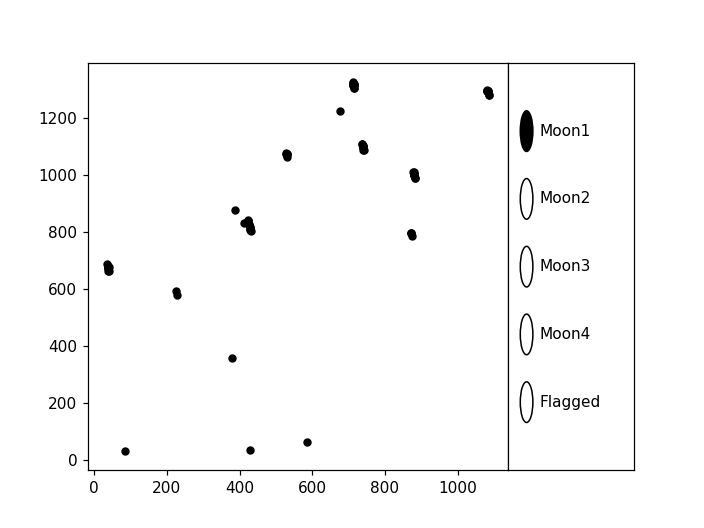

In [27]:
#fig, ax = plt.subplots()
#ax.plot(Y_pix, X_pix, linestyle = " ", marker = ".", color = "R")
#ax.imshow(label_im)
    
# Assuming xMoonLst_pix and yMoonLst_pix variables contain 
# multiple positions associated with each frame. These
# correspond to the moons detected in each frame, which can
# vary in number due to changing signal-to-noise and
# overlapping positions.
#
# Print the moon positions in the 1st 5 frames
for i in range(5):
    coords = list(zip((xMoonLst_pix[i], yMoonLst_pix[i])))
    for j in range(len(coords)):
        print(frmNumLst[i], coords[j])
		
		
# Unpack the moon coordinates and save to 1D arrays alongside the corresponding Neptune coordinate


        

# Convert the data lists into arrays to make masking 
# operations easier later on.
# These arrays track the position of each moon and 
# corresponding Neptune detection
frmMoon = np.array(frmNumLst)
xMoon = np.array(xMoonLst_pix)
yMoon = np.array(yMoonLst_pix)
xNeptune = np.array(xNepLst_pix) -10
yNeptune = np.array(yNepLst_pix) -2


# Now we will use a lasso tool to interactively mark each point as belonging to a particular moon
from lassoManager import LassoManager
fig = plt.figure()
ax = fig.add_subplot(111)
collection = ax.scatter(xMoon, yMoon, s=20, color='k')
labels = ('Moon1', 'Moon2', 'Moon3', 'Moon4', 'Flagged')
laso = LassoManager(ax, collection, labels)
plt.draw()

<IPython.core.display.Javascript object>


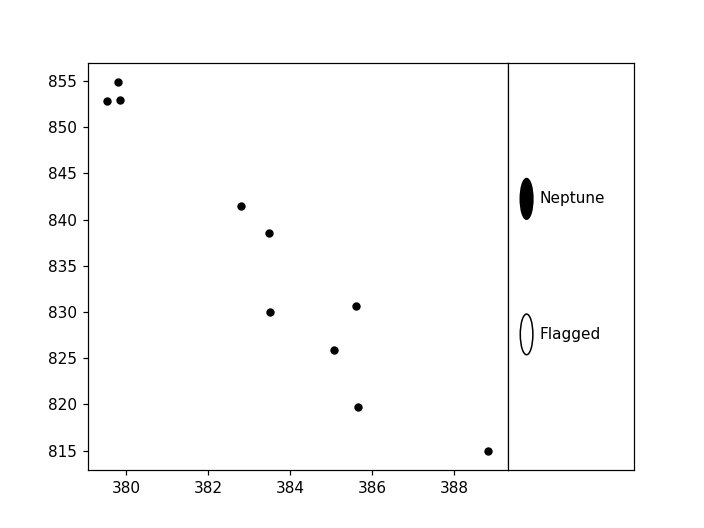

In [29]:
from lassoManager import LassoManager
fig = plt.figure()
ax = fig.add_subplot(111)
collection = ax.scatter(xNeptune, yNeptune, s=20, color='k')
labels = ('Neptune', 'Flagged')
laso = LassoManager(ax, collection, labels)
plt.draw()

<IPython.core.display.Javascript object>


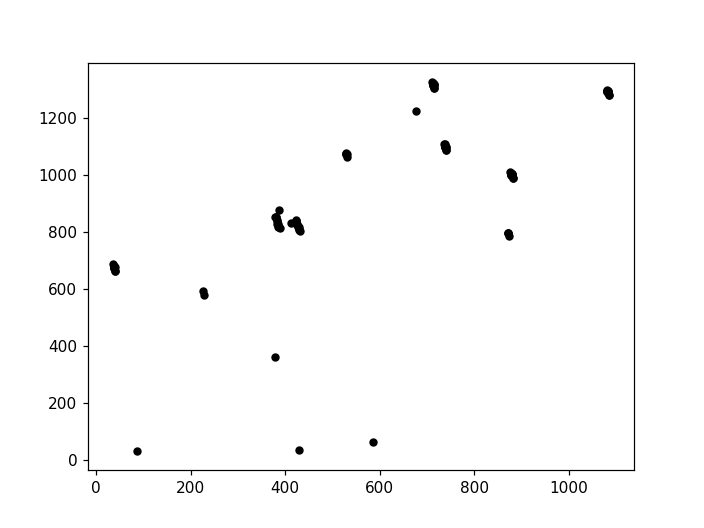

TypeError: __init__() takes from 3 to 4 positional arguments but 5 were given

In [30]:
from lassoManager import LassoManager
fig = plt.figure()
ax = fig.add_subplot(111)
collection = ax.scatter(xNeptune, yNeptune, s=20, color='k')
collection2 = ax.scatter(xMoon, yMoon, s = 20, color='k')
labels = ('Moon1', 'Moon2', 'Moon3', 'Moon4','Jupiter', 'Flagged')
laso = LassoManager(ax, collection, collection2, labels)
plt.draw()

13.308154


<IPython.core.display.Javascript object>


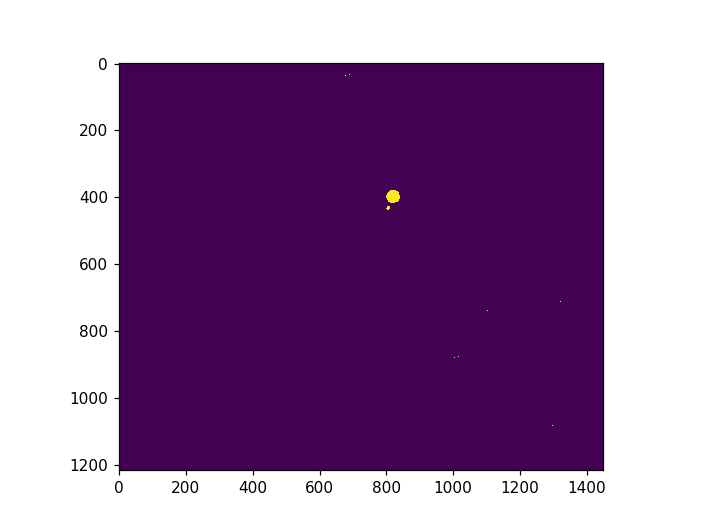

(1216, 1448)
13.308154


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [31]:
#Pixel mask of one image
mean1 = np.mean(frameArr)
print(mean1)
mask = (frameArr > 1.5*mean1)
#mask += 0.1 * mean1
fig, ax = plt.subplots()
ax.imshow(mask)
plt.show()
print(mask.shape)
print(mean1)
mask